# Clustering - PCA

**ALUNOS**: Façam uma breve introdução ao procedimento de clustering e expliquem a importância do pré-processamento para justificar os procedimentos a seguir.

Recomendo que dividam o notebook em seções da forma que acharem mais conveniente.

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "9"

In [2]:
import pandas as pd

DATA = "../data/customers_new_features_and_drop.csv"

df = pd.read_csv(DATA)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,2,1,0,0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,776,734,0,0,0,0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,18-30,53,48,1,1,0,0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,422,407,1,1,0,0,14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

In [4]:
numerical_features = df.select_dtypes(include="number").columns
len(numerical_features)

32

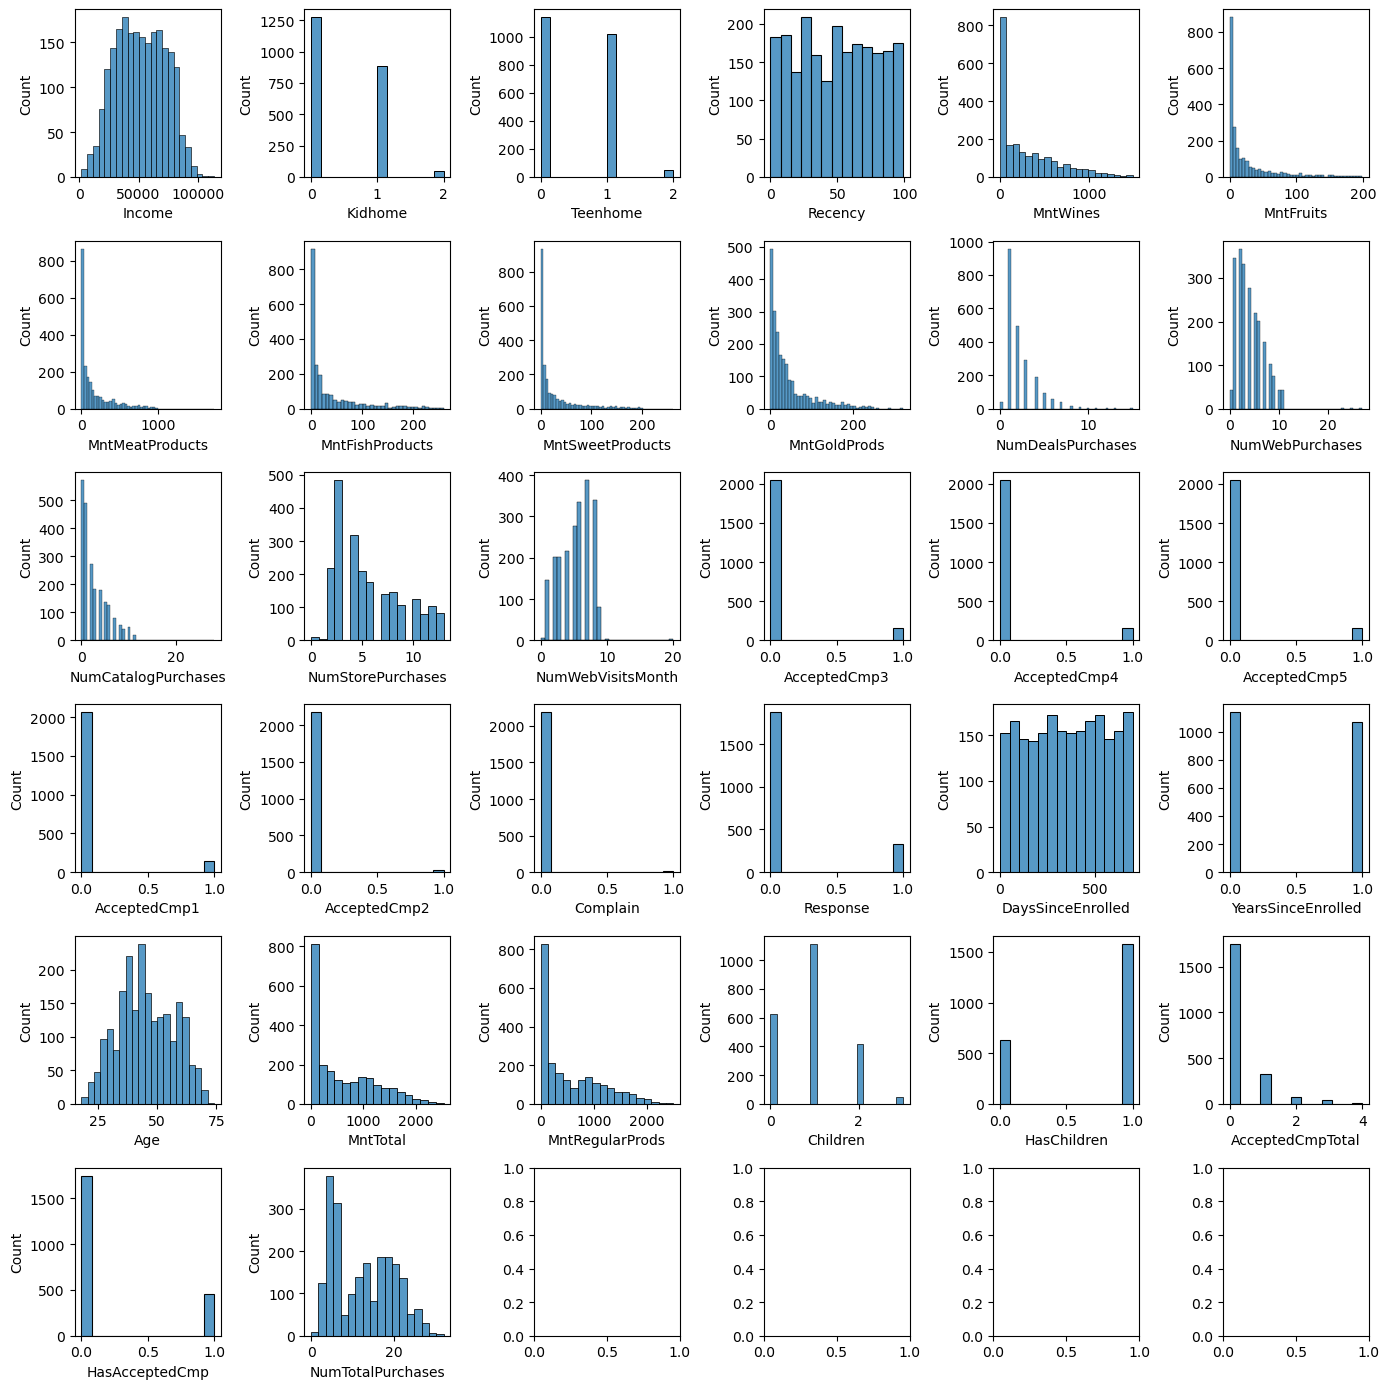

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(14, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), numerical_features):
    sns.histplot(x=feature, ax=ax, data=df)

plt.show()

In [6]:
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Response",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal",
]

standard_cols = [
    "Income",
    "Age",
]

power_cols = df.columns[
   df.columns.str.startswith("Mnt") | df.columns.str.startswith("Num")
].tolist()

minmax_cols = [
    col for col in df.columns if col not in one_hot_cols + standard_cols + power_cols
]

In [7]:
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

preprocessing.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        , ...,  1.31554348,
         1.3107051 ,  1.22117404],
       [ 0.        ,  0.        ,  1.        , ..., -1.44715317,
        -1.45392396, -1.31943784],
       [ 0.        ,  0.        ,  1.        , ...,  0.65850681,
         0.68796397,  1.02538786],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.06873119,
         1.10901986,  0.81760731],
       [ 0.        ,  0.        ,  0.        , ...,  0.72839023,
         0.73883475,  1.12466774],
       [ 0.        ,  0.        ,  0.        , ..., -0.44741865,
        -0.42493797, -0.5090171 ]])

In [8]:
preprocessing.get_feature_names_out()

array(['one-hot__Education_2n Cycle', 'one-hot__Education_Basic',
       'one-hot__Education_Graduation', 'one-hot__Education_Master',
       'one-hot__Education_PhD', 'one-hot__Marital_Status_Partner',
       'one-hot__Marital_Status_Single', 'one-hot__AgeGroup_18-30',
       'one-hot__AgeGroup_31-45', 'one-hot__AgeGroup_46-60',
       'one-hot__AgeGroup_61+', 'one-hot__HasChildren_0',
       'one-hot__HasChildren_1', 'one-hot__HasAcceptedCmp_0',
       'one-hot__HasAcceptedCmp_1', 'one-hot__AcceptedCmp1_0',
       'one-hot__AcceptedCmp1_1', 'one-hot__AcceptedCmp2_0',
       'one-hot__AcceptedCmp2_1', 'one-hot__AcceptedCmp3_0',
       'one-hot__AcceptedCmp3_1', 'one-hot__AcceptedCmp4_0',
       'one-hot__AcceptedCmp4_1', 'one-hot__AcceptedCmp5_0',
       'one-hot__AcceptedCmp5_1', 'one-hot__Complain_0',
       'one-hot__Complain_1', 'one-hot__Response_0',
       'one-hot__Response_1', 'one-hot__Kidhome_0', 'one-hot__Kidhome_1',
       'one-hot__Kidhome_2', 'one-hot__Teenhome_0', 'one-

In [9]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

df_scaled.head()

,one-hot__Education_2n Cycle,one-hot__Education_Basic,one-hot__Education_Graduation,one-hot__Education_Master,one-hot__Education_PhD,one-hot__Marital_Status_Partner,one-hot__Marital_Status_Single,one-hot__AgeGroup_18-30,one-hot__AgeGroup_31-45,one-hot__AgeGroup_46-60,...,power__MntSweetProducts,power__MntGoldProds,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__MntTotal,power__MntRegularProds,power__NumTotalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.387173,1.089046,0.753752,1.332973,1.747828,-0.425453,0.700269,1.315543,1.310705,1.221174
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.976308,-0.947497,0.160834,-1.382228,-0.384719,-1.473644,-0.108417,-1.447153,-1.453924,-1.319438
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.546813,0.442997,-0.838557,1.332973,0.150188,1.239811,-0.527390,0.658507,0.687964,1.025388
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.525155,-1.052464,0.160834,-0.726457,-1.341911,-0.425453,0.300240,-1.123214,-1.066232,-0.877589
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.694250,-0.350932,1.453779,0.521339,0.518935,0.278071,-0.108417,0.175065,0.238799,0.356875


In [10]:
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith("one")]
scaled_columns_not_one_hot

Index(['standard__Income', 'standard__Age', 'minmax__Recency',
       'minmax__DaysSinceEnrolled', 'power__MntWines', 'power__MntFruits',
       'power__MntMeatProducts', 'power__MntFishProducts',
       'power__MntSweetProducts', 'power__MntGoldProds',
       'power__NumDealsPurchases', 'power__NumWebPurchases',
       'power__NumCatalogPurchases', 'power__NumStorePurchases',
       'power__NumWebVisitsMonth', 'power__MntTotal', 'power__MntRegularProds',
       'power__NumTotalPurchases'],
      dtype='object')

In [11]:
len(scaled_columns_not_one_hot)

18

**ALUNOS**: Discutam as mudanças de perfil nos gráficos a seguir.

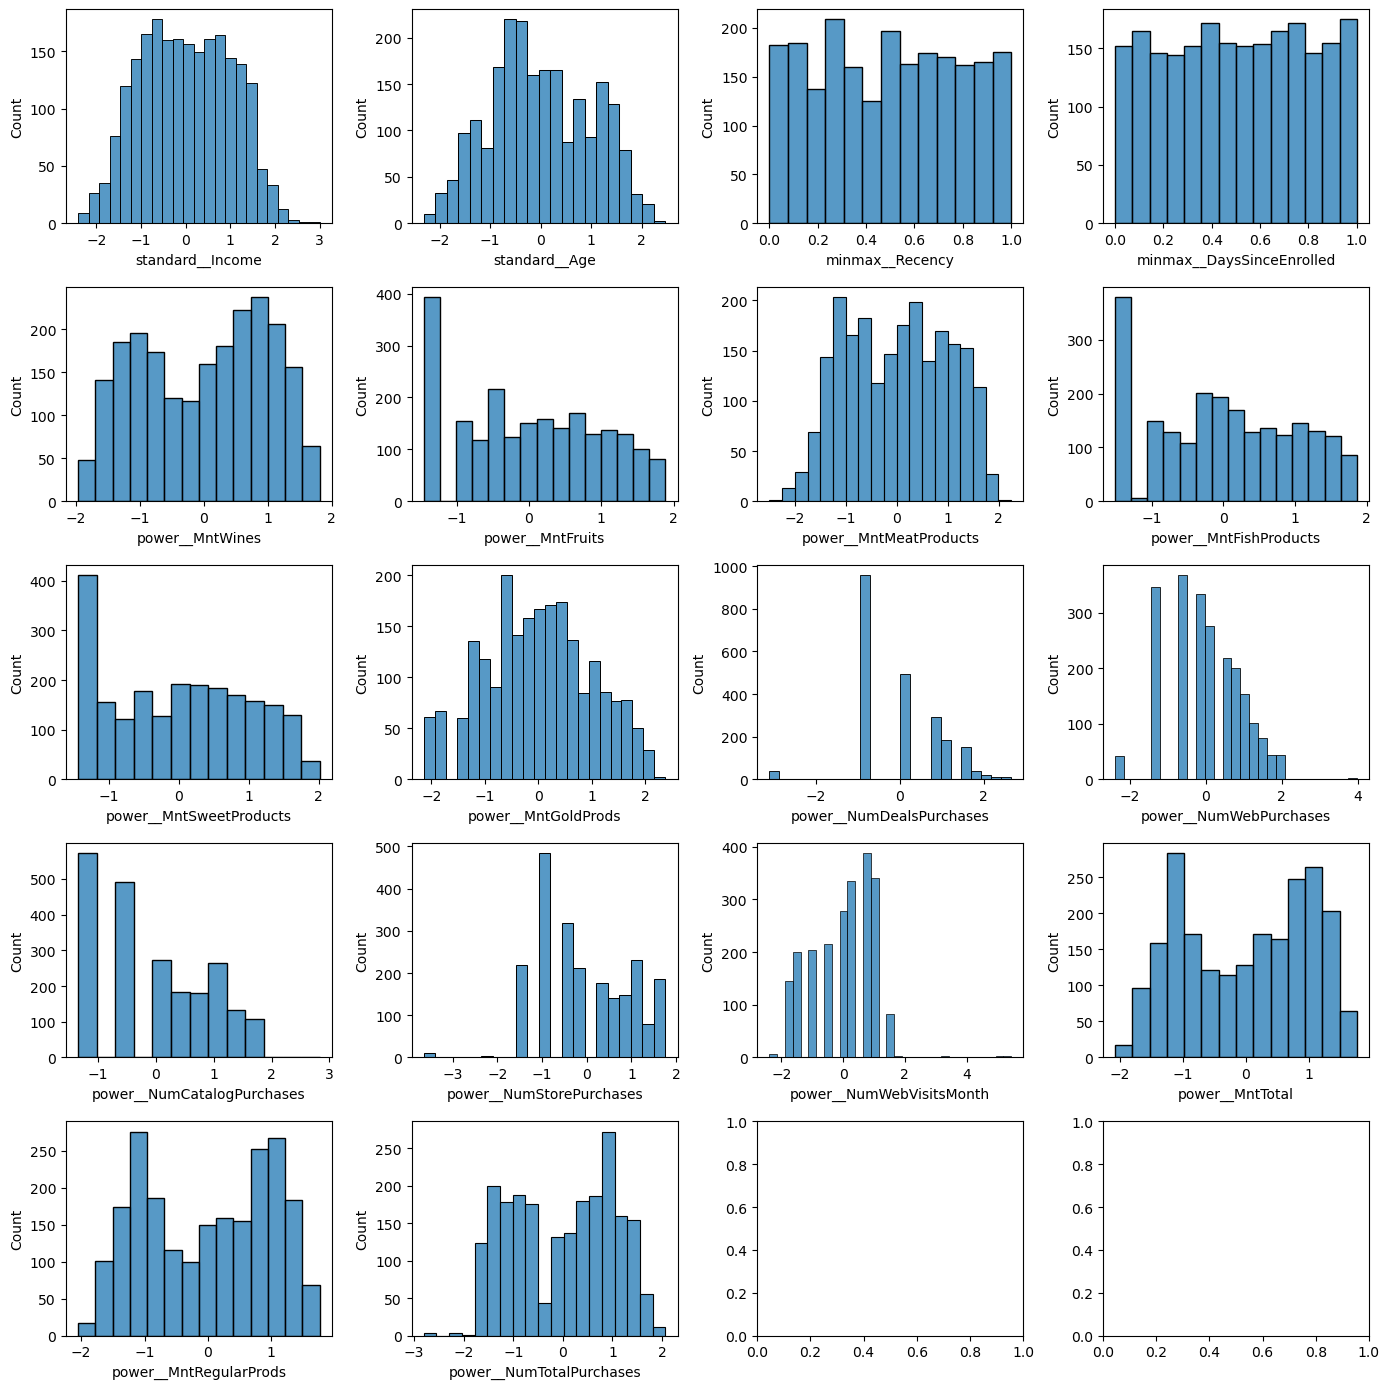

In [12]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(14, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), scaled_columns_not_one_hot):
    sns.histplot(x=feature, ax=ax, data=df_scaled)

plt.show()

**ALUNOS**: Expliquem brevemente os métodos e seus significados.

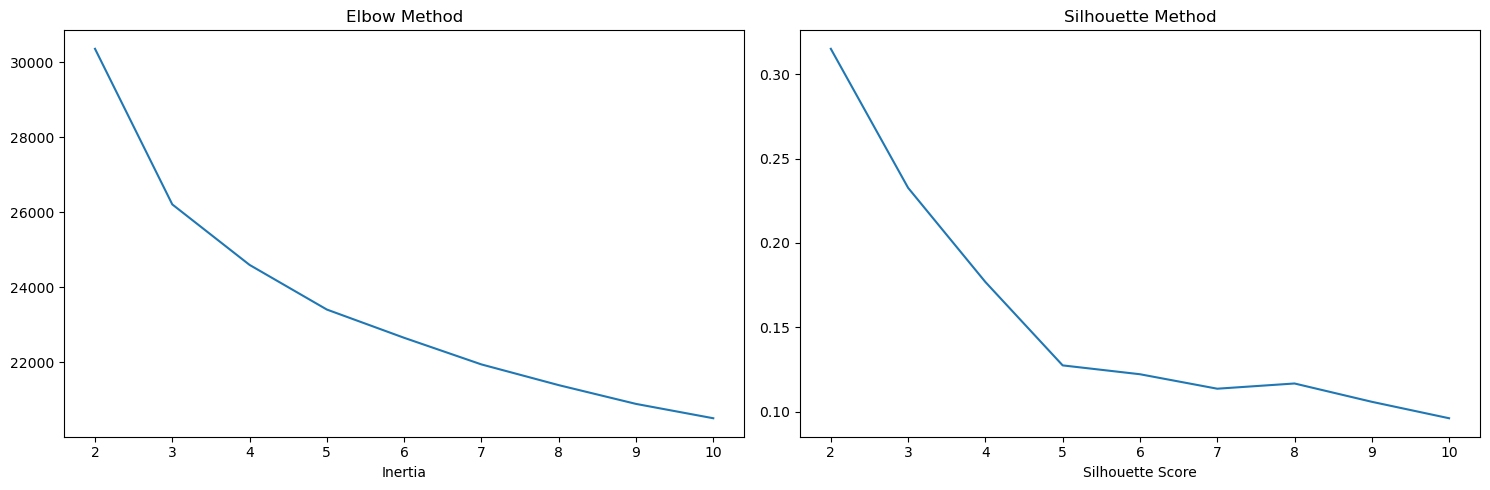

In [13]:
from auxiliary_functions import plot_elbow_silhouette

plot_elbow_silhouette(df_scaled)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard', Sta...
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [15]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [16]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'AgeGroup',
                                   'HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Response',
                                   'Kidhome', 'Teenhome', 'YearsSinceEnrolled',
                                   'Children', 'AcceptedCmpTotal']),
                                 ('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('minmax', MinMaxScaler(),
                                  ['Recency', 'DaysSinceEnrolled']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                            

In [17]:
pipeline["clustering"].labels_

array([0, 1, 0, ..., 0, 0, 2])

In [18]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [19]:
df_clustered["cluster"].value_counts().sort_index()

0    600
1    890
2    715
Name: cluster, dtype: int64

**ALUNOS**: Expliquem os gráficos, falem sobre as funções criadas e seus papéis. 

c:\Users\chico\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


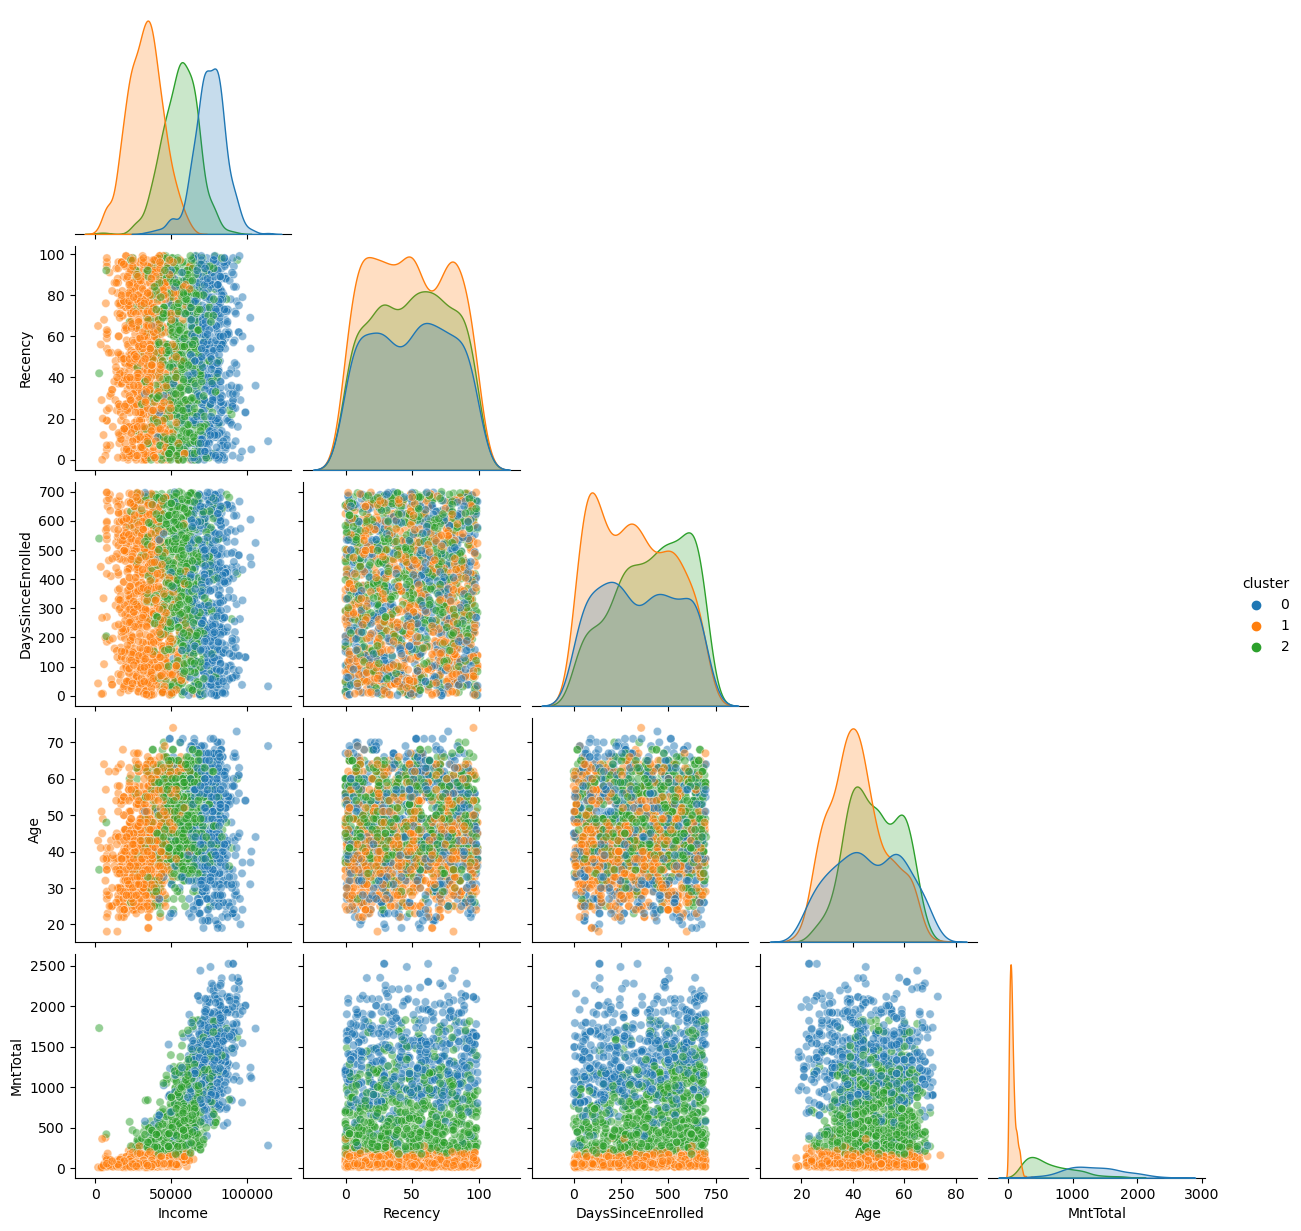

In [20]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
]

from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")

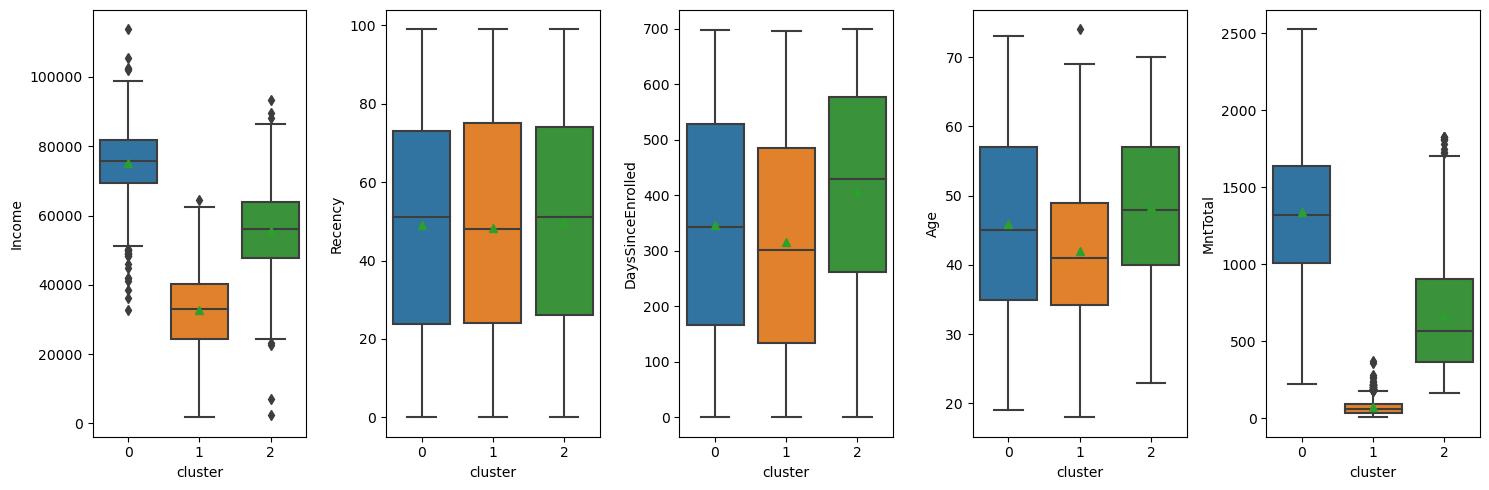

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x="cluster", y=col, data=df_clustered, ax=ax, showmeans=True)

In [22]:
columns = [
    "HasChildren",
    "Marital_Status",
    "Education",
    "HasAcceptedCmp",
    "Response",
    "YearsSinceEnrolled",
]

cluster_diff_cols = ["MntTotal", "Income"]

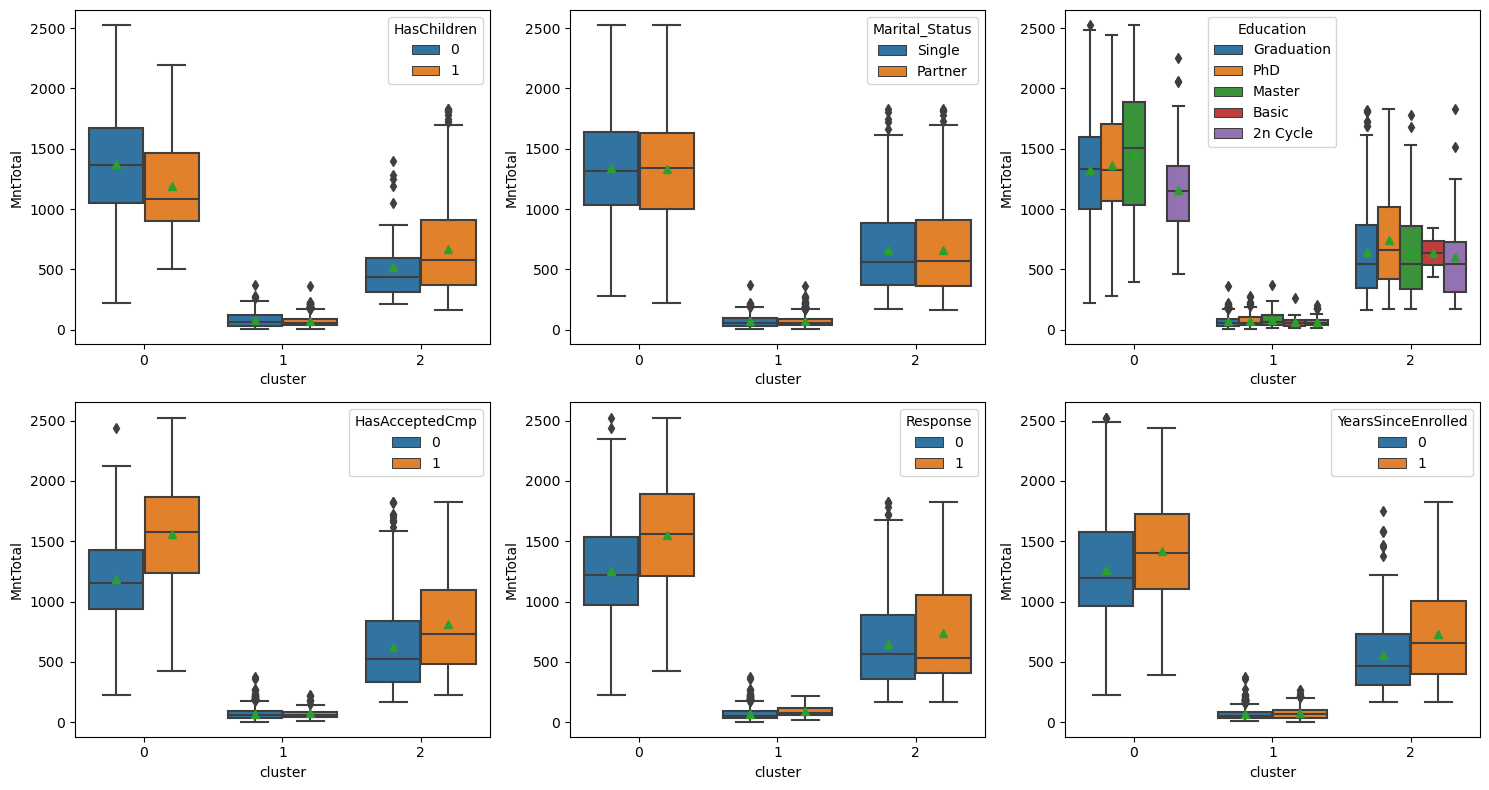

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(
        x="cluster",
        y=cluster_diff_cols[0],
        data=df_clustered,
        ax=ax,
        showmeans=True,
        hue=col,
    )

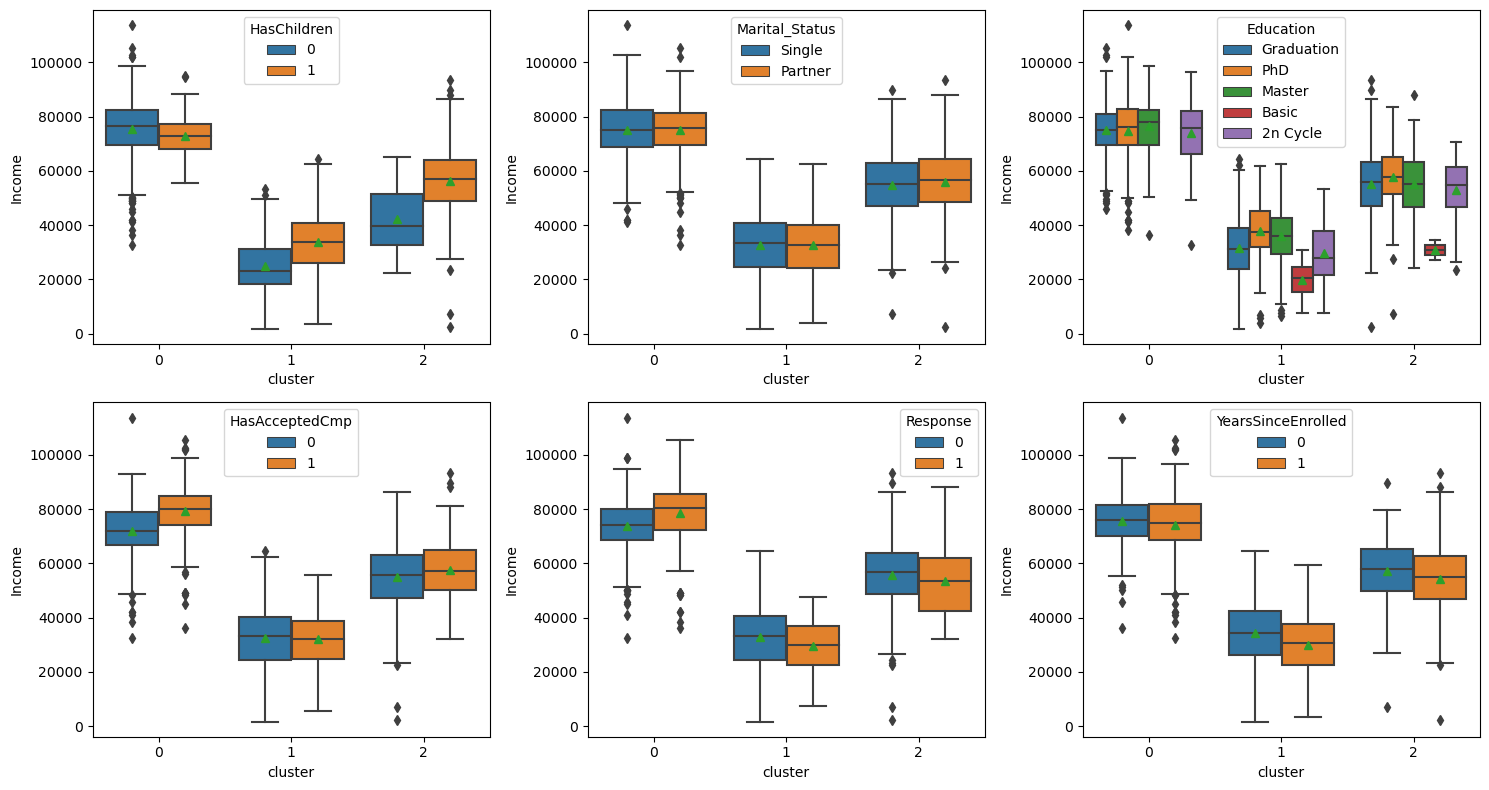

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(
        x="cluster",
        y=cluster_diff_cols[1],
        data=df_clustered,
        ax=ax,
        showmeans=True,
        hue=col,
    )

In [25]:
df_clustered["cluster"].nunique()

3

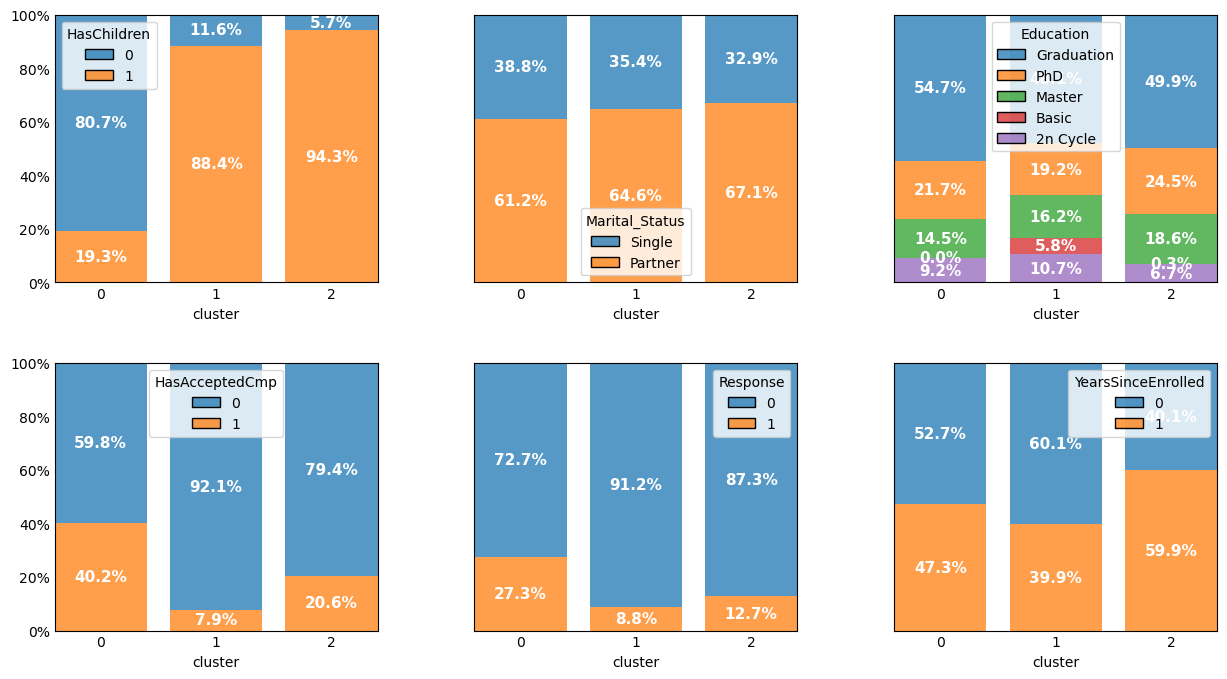

In [26]:
from auxiliary_functions import plot_columns_percent_by_cluster

plot_columns_percent_by_cluster(
    dataframe=df_clustered,
    columns=columns,
)

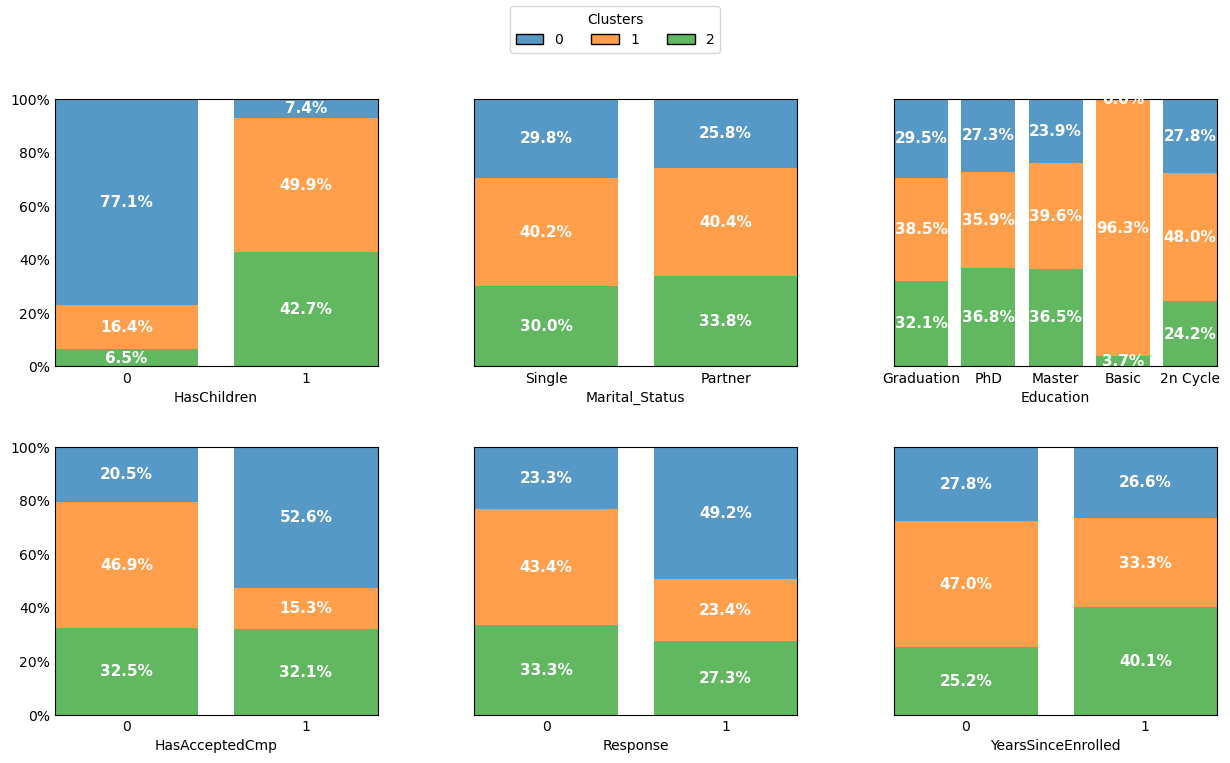

In [27]:
from auxiliary_functions import plot_columns_percent_hue_cluster

plot_columns_percent_hue_cluster(
    dataframe=df_clustered,
    columns=columns,
)

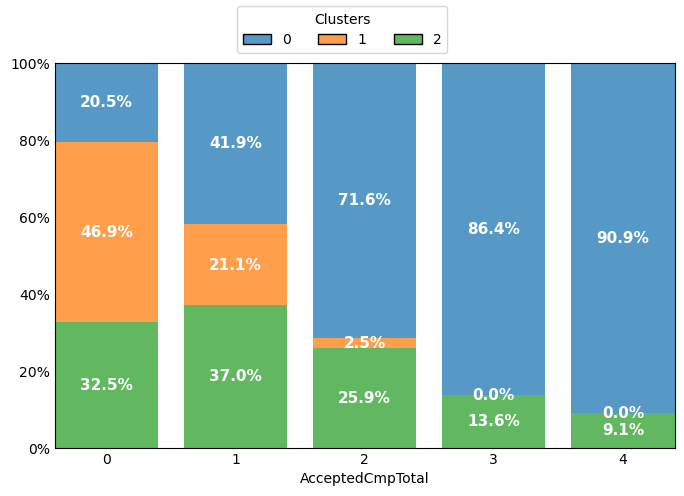

In [28]:
plot_columns_percent_hue_cluster(
    dataframe=df_clustered,
    columns=["AcceptedCmpTotal"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)

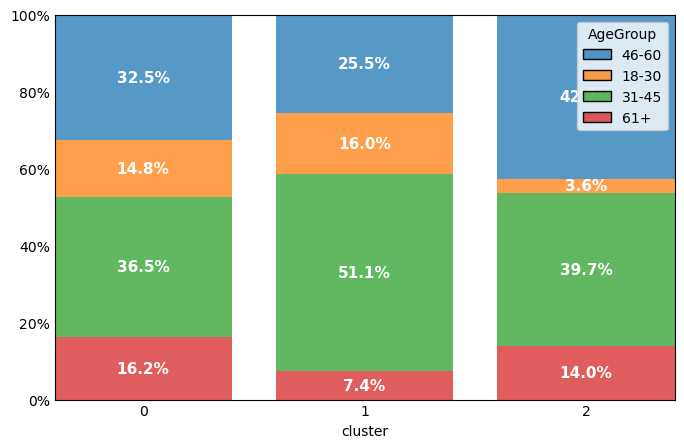

In [29]:
plot_columns_percent_by_cluster(
    dataframe=df_clustered,
    columns=["AgeGroup"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)

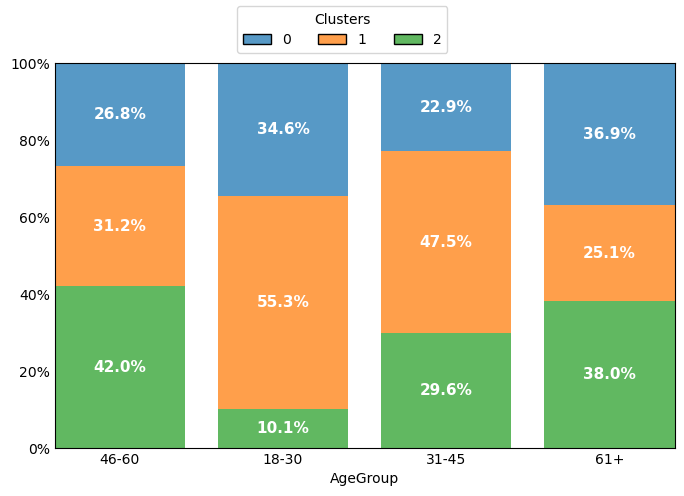

In [30]:
plot_columns_percent_hue_cluster(
    dataframe=df_clustered,
    columns=["AgeGroup"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)

**ALUNOS**: Treinem tornar as descrições dos clusters a seguir mais técnicas e, depois, mais qualitativas. Pensem no público alvo de cada forma de descrição (público técnico ou não-técnico).

Análise por cluster:

- Cluster 0: 
  - Renda alta 
  - gasto alto 
  - muito provalmente não tem filhos
  - mais propenso a aceitar campanhas
  - cluster sem pessoas com escolaridade básica
  - sem um perfil de idade que se destaque
  

- Cluster 1: 
  - Renda baixa 
  - gasto baixo 
  - provalmente tem filhos
  - baixa propensão a aceitar campanhas
  - único cluster com porcentagem significativa de pessoas com escolaridade básica
  - pessoas mais jovens
  

- Cluster 2: 
  - Renda intermediária
  - gasto intermediário
  - provalmente tem filhos
  - pode aceitar campanhas
  - pessoas com idade mais elevada


**ALUNOS**: Expliquem PCA e a visualização obtida

In [31]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard', Sta...
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [32]:
pipeline[:-1]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard', Sta...
                                                  ['Recency',
                                                   'DaysSinceEnrolled']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('pca', PCA(n_components=2, random_state=42))])

In [33]:
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

In [34]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1
0,-4.123249,0.543168
1,3.911560,-0.014417
2,-3.097421,-0.905986
3,3.293046,-0.813207
4,-0.960644,0.395304


In [35]:
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[-3.77153169, -1.1474064 ],
       [ 3.42584025, -0.38799619],
       [-1.10574881,  1.44838718]])

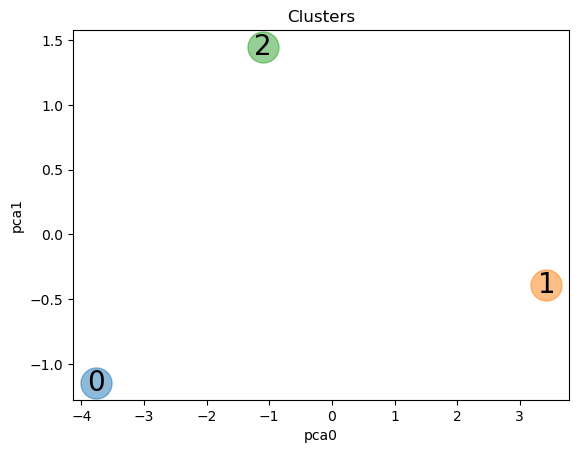

In [36]:
from auxiliary_functions import plot_clusters_2D

plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns,
    n_colors=3,
    centroids=centroids
)

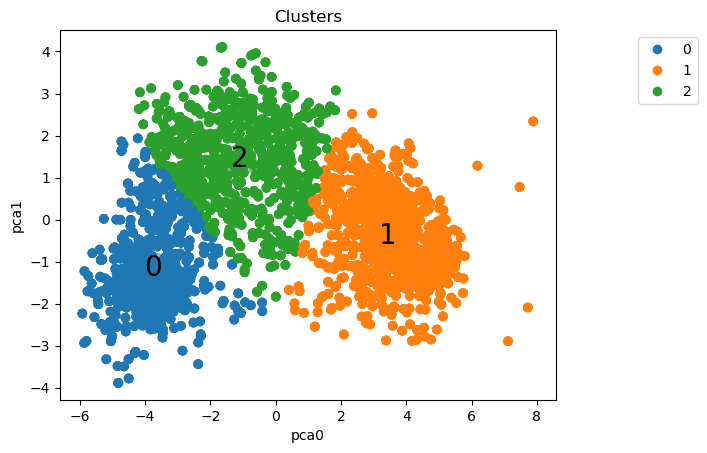

In [37]:
plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns,
    n_colors=3,
    centroids=centroids,
    show_points=True,
    column_clusters=df_clustered["cluster"]
)

In [38]:
df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [39]:
df_clustered.to_csv("../data/customers_clustered.csv", index=False)